In [4]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization



Using TensorFlow backend.


In [7]:
fpath = "C:/Users/SEHRISH/Desktop/Thesis/coins/Coin Data Set/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of coins = ",categories,"\n\nNo. of Sets = ", len(categories))



List of coins =  ['Images'] 

No. of Sets =  1


In [8]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
#print(type(images),type(labels))

No. of images loaded =  180 
No. of labels loaded =  180


In [9]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (180, 227, 227, 3) 
Labels shape =  (180,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


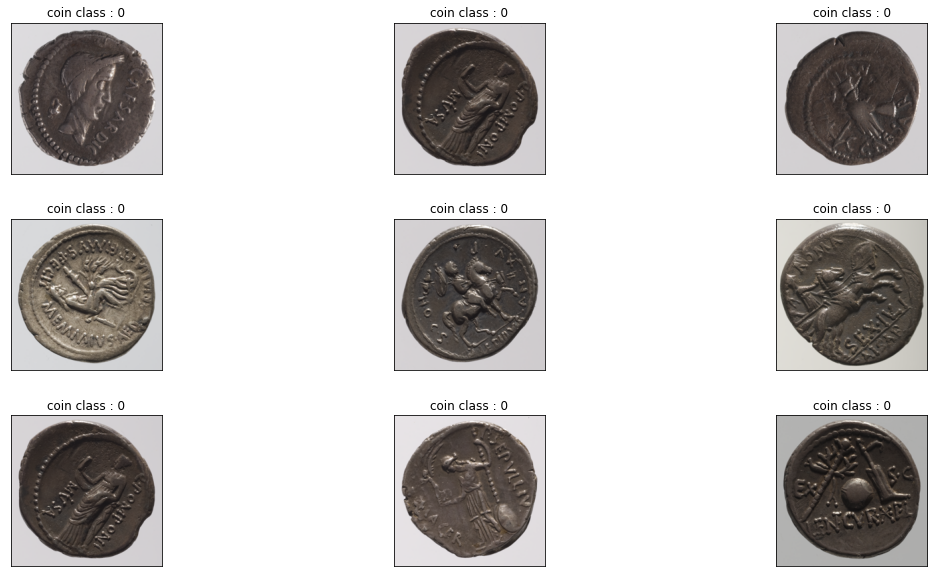

In [10]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('coin class : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [11]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]

'n' values after shuffling =  [ 19  42 153  78 145  15  24  68 113 118  93 159  69 142  45  16  51 125
  96  56  97 120 143  30   9 172  60  18 148 173 109  55 140 126  66  29
 117  65  67  31  12  41 124 100 161 132  90  38 169 115 171 

In [12]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (180, 227, 227, 3) 
Labels shape after shuffling =  (180,)


In [13]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (180, 227, 227, 3)


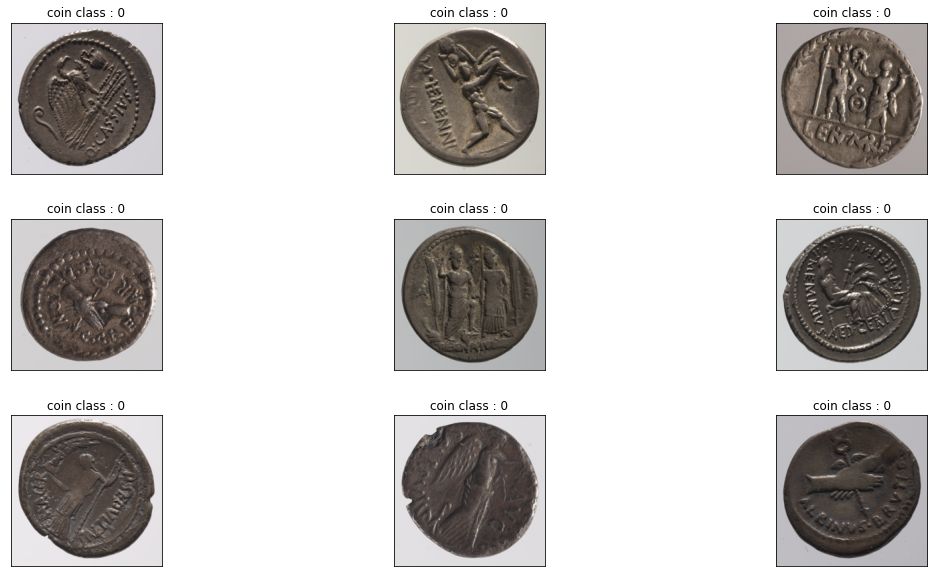

In [14]:
display_rand_images(images, labels)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (162, 227, 227, 3)
y_train shape =  (162,)

x_test shape =  (18, 227, 227, 3)
y_test shape =  (18,)


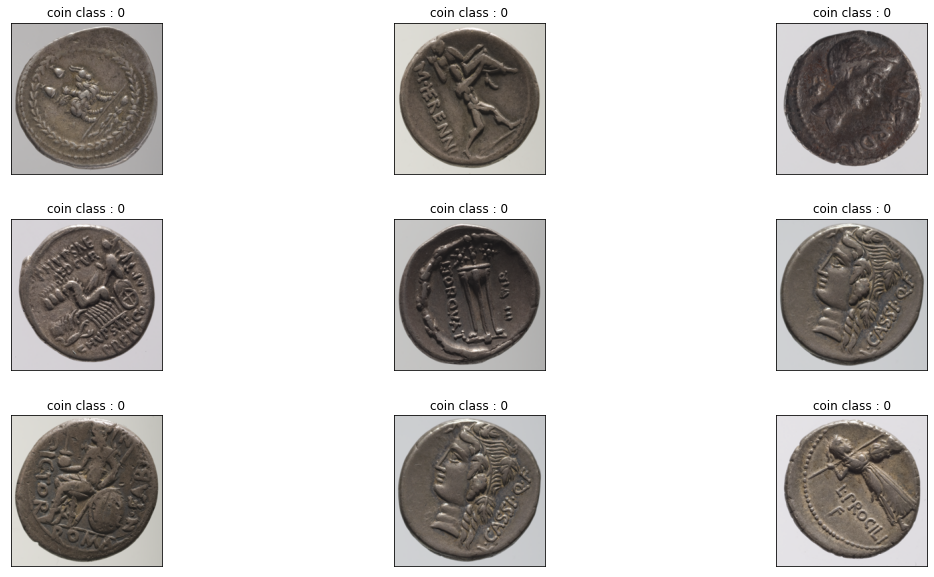

In [16]:
display_rand_images(x_train, y_train)

In [17]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)        

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
%%time
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
162/162 [==============================] - 67s 411ms/step - loss: 3.7875 - accuracy: 0.0309
Epoch 2/50
162/162 [==============================] - 24s 149ms/step - loss: 3.5723 - accuracy: 0.0679
Epoch 3/50
162/162 [==============================] - 24s 147ms/step - loss: 3.2188 - accuracy: 0.1420
Epoch 4/50
162/162 [==============================] - 27s 166ms/step - loss: 2.8665 - accuracy: 0.2284
Epoch 5/50
162/162 [==============================] - 27s 165ms/step - loss: 2.4935 - accuracy: 0.2901
Epoch 6/50
162/162 [==============================] - 27s 165ms/step - loss: 2.2103 - accuracy: 0.4444
Epoch 7/50
162/162 [==============================] - 23s 141ms/step - loss: 1.8448 - accuracy: 0.5679
Epoch 8/50
162/162 [==============================] - 18s 114ms/step - loss: 1.5729 - accuracy: 0.6914
Epoch 9/50
162/162 [==============================] - 18s 111ms/step - loss: 1.3103 - accuracy: 0.7593
Epoch 10/50
162/162 [==============================] - 18s 112ms/step - l

In [20]:
# evaluate the model
train_acc = model.evaluate(x_test, y_test, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)


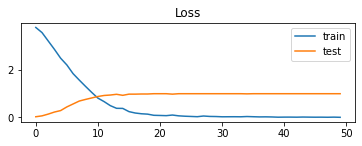

In [21]:
import matplotlib.pyplot as plt 
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()



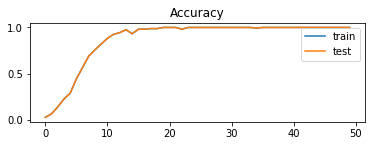

In [22]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()
plt.show()

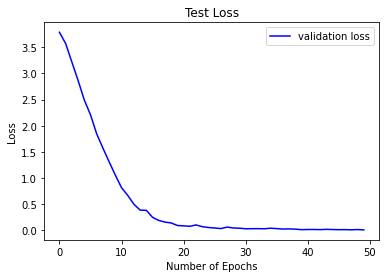

In [23]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

print( "Loss=" , loss , "Accuracy" ,  accuracy)

18/18 [==============================] - 0s 27ms/step
Loss= 0.0038682324811816216 Accuracy 1.0


In [25]:
pred = model.predict(x_test)

pred.shape

(18, 20)

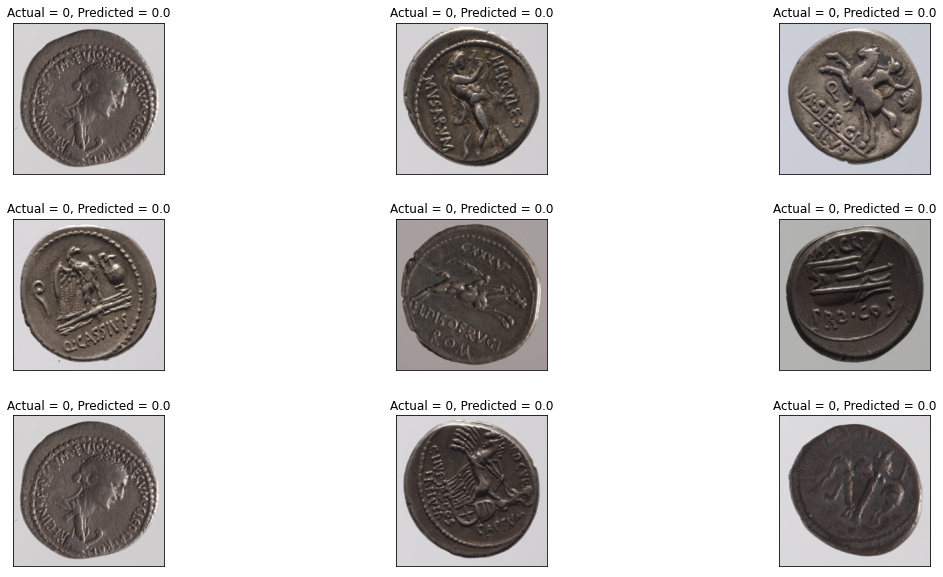

In [26]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()